In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [108]:
matches = pd.read_csv('C:/Users/Hp/Desktop/WPL/matches.csv')
deliveries = pd.read_csv('C:/Users/Hp/Desktop/WPL/deliveries.csv')

In [109]:
all_matches = matches[(matches['team1'].isin(['Mumbai ICndians', 'Sunrisers Hyderabad'])) & (matches['team2'].isin(['Mumbai Indians', 'Sunrisers Hyderabad']))]
data = pd.merge(matches, deliveries, how = "inner", left_on = 'id', right_on = 'match_id')
sub_data = data[(data['team1'].isin(['Mumbai Indians', 'Sunrisers Hyderabad'])) & (data['team2'].isin(['Mumbai Indians', 'Sunrisers Hyderabad']))]

### Who will win the match??

In [110]:
all_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
9,10,2017,Mumbai,4/12/2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
46,47,2017,Hyderabad,5/8/2017,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,normal,0,Sunrisers Hyderabad,0,7,S Dhawan,"Rajiv Gandhi International Stadium, Uppal",KN Ananthapadmanabhan,M Erasmus,NaN
422,423,2013,Hyderabad,5/1/2013,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,normal,0,Sunrisers Hyderabad,0,7,I Sharma,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,S Asnani,NaN
443,444,2013,Mumbai,5/13/2013,Sunrisers Hyderabad,Mumbai Indians,Sunrisers Hyderabad,bat,normal,0,Mumbai Indians,0,7,KA Pollard,Wankhede Stadium,AK Chaudhary,SJA Taufel,NaN
476,477,2014,NaN,4/30/2014,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


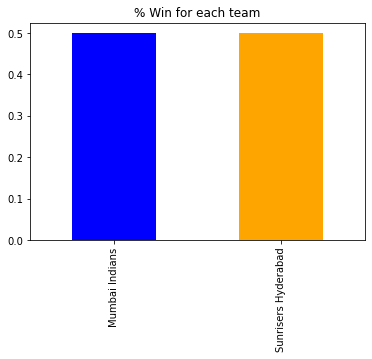

In [111]:
all_matches['winner'].value_counts(normalize=True).plot.bar(title='% Win for each team', color=['Blue', 'Orange'])

In [112]:
match_id_1 = all_matches.groupby('season')['id'].unique().apply(lambda x : x[0]).values.tolist()
match_id_2 = all_matches.groupby('season')['id'].unique().apply(lambda x : x[1] if len(x)>1 else x[0]).values.tolist()

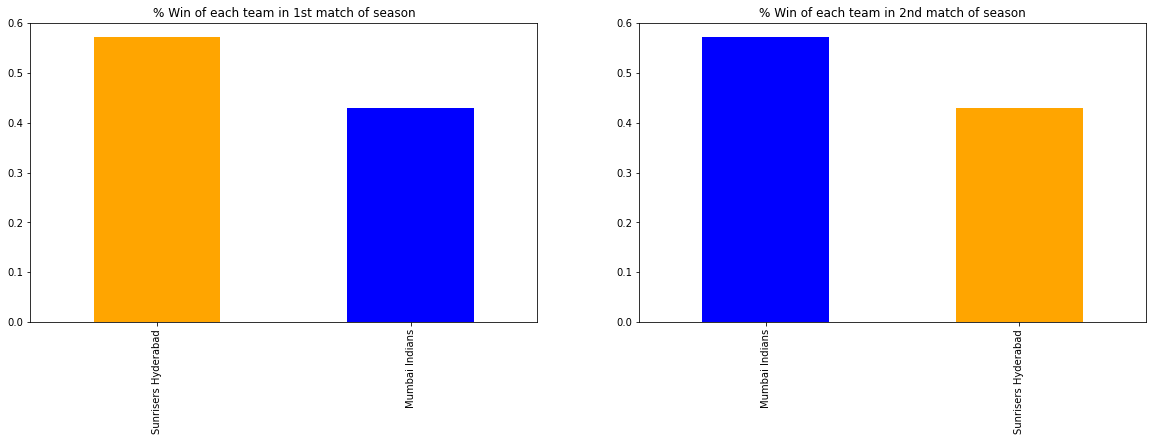

In [113]:
plt.subplot(1, 2 ,1)
all_matches[all_matches['id'].isin(match_id_1)]['winner'].value_counts(normalize=True).plot.bar(title='% Win of each team in 1st match of season', figsize=(20,5.5), color = ['Orange', 'Blue'])

plt.subplot(1, 2, 2)
all_matches[all_matches['id'].isin(match_id_2)]['winner'].value_counts(normalize=True).plot.bar(title='% Win of each team in 2nd match of season', color = ['Blue', 'Orange'])

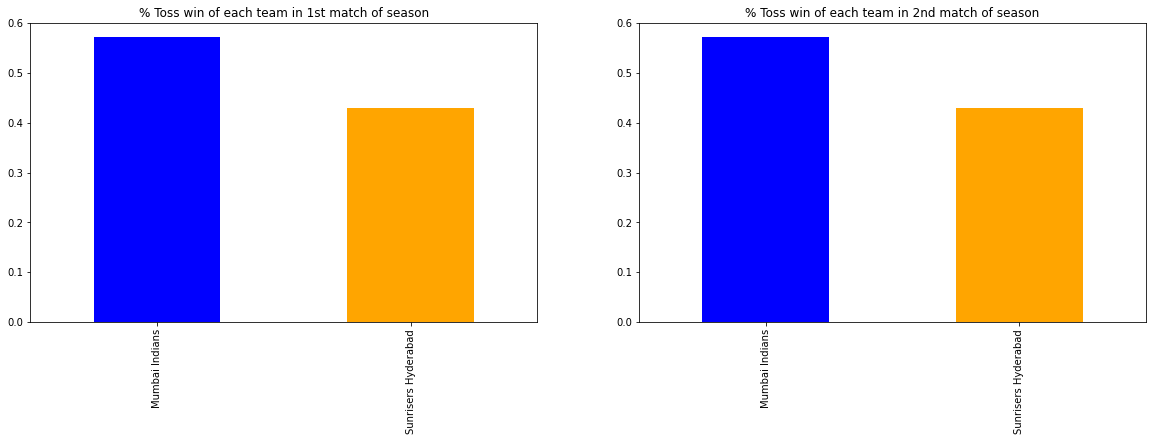

In [114]:
plt.subplot(1, 2 ,1)
all_matches[all_matches['id'].isin(match_id_1)]['toss_winner'].value_counts(normalize=True).plot.bar(title='% Toss win of each team in 1st match of season', figsize=(20,5.5), color = ['Blue', 'Orange'])

plt.subplot(1, 2, 2)
all_matches[all_matches['id'].isin(match_id_2)]['toss_winner'].value_counts(normalize=True).plot.bar(title='% Toss win of each team in 2nd match of season', color = ['Blue', 'Orange'])

In [115]:
pd.crosstab(all_matches['toss_winner'], all_matches['toss_decision'])

toss_decision,bat,field
toss_winner,,
Mumbai Indians,4,4
Sunrisers Hyderabad,3,3


In [116]:
pd.crosstab(all_matches['toss_decision'], all_matches['winner'])

winner,Mumbai Indians,Sunrisers Hyderabad
toss_decision,,
bat,5,2
field,2,5


In [117]:
all_matches.groupby(['season', 'winner'])['win_by_runs', 'win_by_wickets'].max()

win_by_runs  win_by_wickets
season winner                                          
2013   Mumbai Indians                 0               7
       Sunrisers Hyderabad            0               7
2014   Mumbai Indians                 0               7
       Sunrisers Hyderabad           15               0
2015   Mumbai Indians                20               9
2016   Sunrisers Hyderabad           85               7
2017   Mumbai Indians                 0               4
       Sunrisers Hyderabad            0               7
2018   Sunrisers Hyderabad           31               1
2019   Mumbai Indians                40               0

In [118]:
all_matches.groupby('venue')['winner'].value_counts()

venue                                                winner             
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium  Sunrisers Hyderabad    1
Dubai International Cricket Stadium                  Sunrisers Hyderabad    1
Rajiv Gandhi International Stadium, Uppal            Sunrisers Hyderabad    4
                                                     Mumbai Indians         2
Rajiv Gandhi Intl. Cricket Stadium                   Mumbai Indians         1
Wankhede Stadium                                     Mumbai Indians         4
                                                     Sunrisers Hyderabad    1
Name: winner, dtype: int64

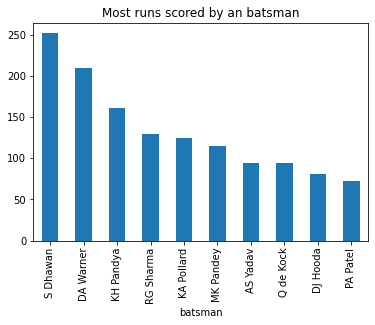

In [119]:
sub_data[sub_data['season']>2015].groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10).plot.bar(title='Most runs scored by an batsman')

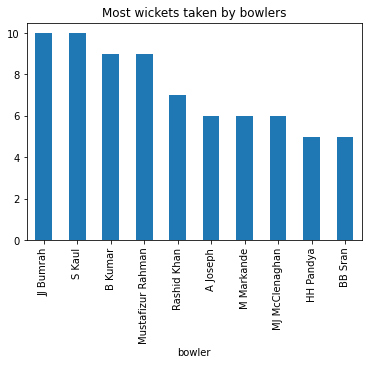

In [120]:
sub_data[sub_data['season']>2015].groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(10).plot.bar(title='Most wickets taken by bowlers')

### Stamina Score

In [121]:
def in_crease(df):
    balls_non_striker = 0
    balls_strike = 0
    match = df.match_id.unique()[0]
    dummy = sub_data[sub_data['match_id']==match]
    player = df['batsman'].unique()[0]
    for i in dummy.non_striker:
        if i == player:
            balls_non_striker += 1
    
    for i in df.ball:
        balls_strike += 1
    
    return balls_strike + balls_non_striker

In [122]:
def Stamina_Score(df):
    # Filtering batsman who score less than or equal to 15 runs in a match
    dummy = pd.DataFrame(df.groupby(['match_id', 'batsman'])['batsman_runs'].sum())
    index = dummy[dummy['batsman_runs']<=15].index
    for i, j in index:
        df.drop(df[(df['match_id']==i) & (df['batsman']==j)].index, inplace = True)
        
    # Grouping the data based on a particular condition for formula calculation
    non_boundary_runs = df[df['batsman_runs'].isin([1, 2, 3])].groupby(['match_id', 'batsman'])['batsman_runs'].sum()
    boundary_runs = df[df['batsman_runs'].isin([4, 5, 6, 7])].groupby(['match_id', 'batsman'])['batsman_runs'].sum()
    balls_faced = df.groupby(['match_id', 'batsman'])['ball'].count()
    non_striker_balls = df.groupby(['match_id', 'non_striker'])['ball'].count()
    total_runs_scored = df.groupby(['match_id', 'batsman'])['batsman_runs'].sum()
    balls_in_crease = df.groupby(['match_id', 'batsman']).apply(in_crease)
    
    ss = (((non_boundary_runs / (boundary_runs+1)) + (balls_faced / balls_in_crease)) / total_runs_scored)
    min_ss = min(ss)
    max_ss = max(ss)
    
    normalized_ss = ((ss - min_ss) / (max_ss - min_ss))
    
    return normalized_ss

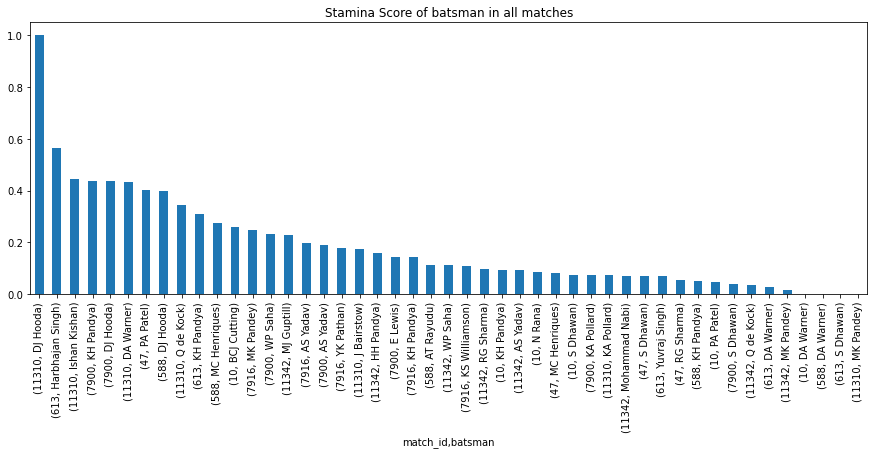

In [135]:
Stamina_Score(sub_data[sub_data['season']>2015]).sort_values(ascending=False).plot.bar(title='Stamina Score of batsman in all matches', figsize=(15,5))

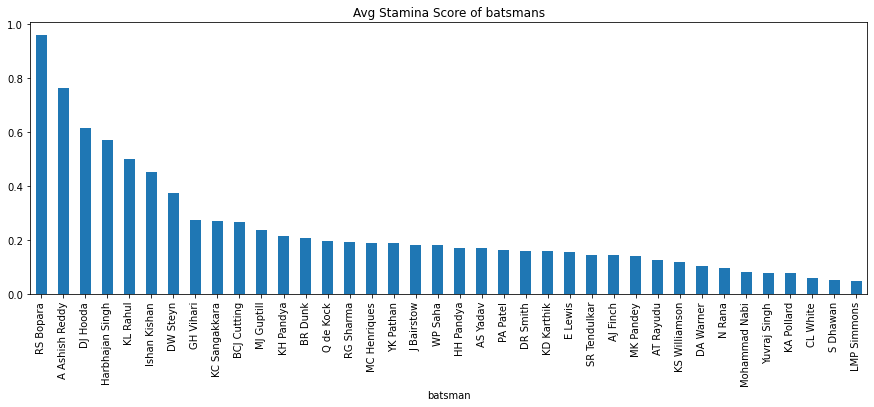

In [146]:
Stamina_Score(sub_data).groupby('batsman').mean().sort_values(ascending=False).plot.bar(title='Avg Stamina Score of batsmans', figsize=(15,5))

In [147]:
key_batters = ['DA Warner', 'WP Saha', 'MK Pandey', 'KS Williamson', 'JO Holder', 'J Bairstow', 'Ishan Kishan', 'Q de Kock', 'SA Yadav', 'SS Tiwary', 'KA Pollard', 'KH Pandya', 'HH Pandya', 'NM Coulter-Nile', 'RG Sharma']

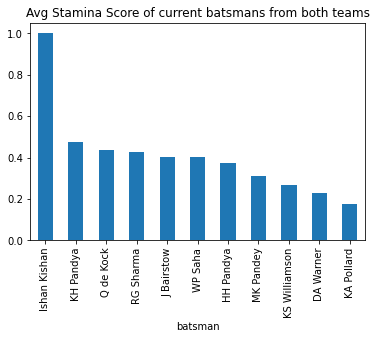

In [153]:
Stamina_Score(sub_data[sub_data['batsman'].isin(key_batters)]).groupby('batsman').mean().sort_values(ascending=False).plot.bar(title='Avg Stamina Score of current batsmans from both teams')

### Smash Rate

In [124]:
def decider(df):
    over_arrived = pd.DataFrame(df.groupby(['match_id', 'batsman', 'batting_team'])['over'].unique().apply(lambda x : x[0])).reset_index()
    boundary_hit = pd.DataFrame(df[df['batsman_runs'].isin([6, 7])].groupby(['match_id', 'batsman', 'batting_team'])['batsman_runs'].count()).reset_index()
    total_runs_scored = pd.DataFrame(df.groupby(['match_id', 'batsman', 'batting_team'])['batsman_runs'].sum()).reset_index()
    combined_data = pd.merge(over_arrived, boundary_hit, how='outer')
    total_runs_scored.rename(columns = {'batsman_runs' : 'total_runs_scored'}, inplace=True)
    sr_decider = pd.merge(total_runs_scored, combined_data, how='outer')
    sr_decider.rename(columns={'batsman_runs' : '6s'}, inplace=True)
    sr_decider['6s'].fillna(0, inplace=True)
    return sr_decider

In [125]:
def Smash_Rate(df):
    num_boundaries = df[df['batsman_runs'].isin([4, 5, 6, 7])].groupby(['match_id', 'batsman'])['batsman_runs'].count() 
    tot_balls = df.groupby(['match_id', 'batsman'])['ball'].count()
    sr = (num_boundaries / tot_balls) * 100
    
    return sr

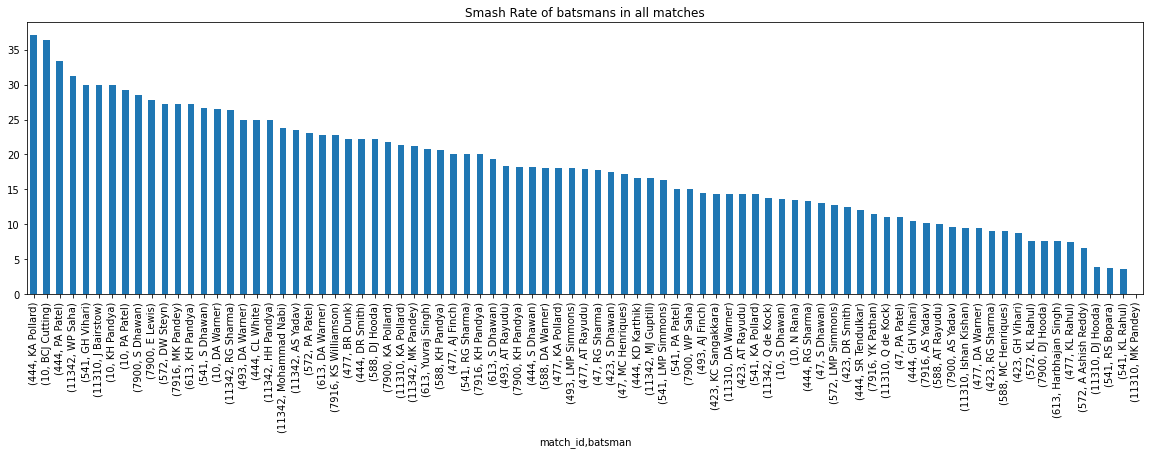

In [157]:
Smash_Rate(sub_data).sort_values(ascending=False).plot.bar(title='Smash Rate of batsmans in all matches', figsize=(20,5))

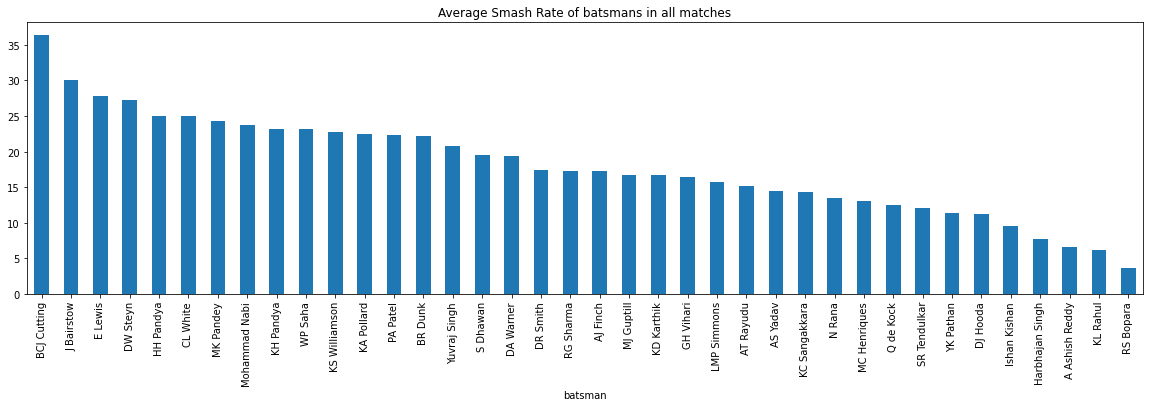

In [159]:
Smash_Rate(sub_data).groupby('batsman').mean().sort_values(ascending=False).plot.bar(title='Average Smash Rate of batsmans in all matches', figsize=(20,5))

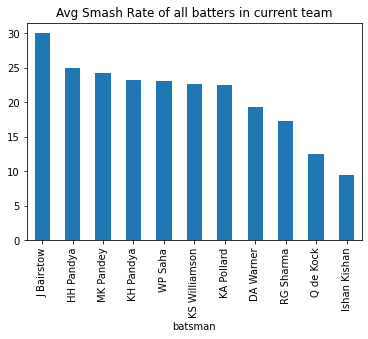

In [163]:
Smash_Rate(sub_data[sub_data['batsman'].isin(key_batters)]).groupby('batsman').mean().sort_values(ascending=False).plot.bar(title='Avg Smash Rate of all batters in current team')

In [166]:
decider(sub_data).sort_values(by = ['total_runs_scored', '6s'], ascending=False).head(10)

,match_id,batsman,batting_team,total_runs_scored,over,6s
49,588,DA Warner,Sunrisers Hyderabad,90,1,4.0
56,613,S Dhawan,Sunrisers Hyderabad,82,1,1.0
29,477,KA Pollard,Mumbai Indians,78,6,6.0
82,11342,Q de Kock,Mumbai Indians,75,2,2.0
15,423,S Dhawan,Sunrisers Hyderabad,73,2,1.0
80,11342,MK Pandey,Sunrisers Hyderabad,72,5,2.0
34,493,LMP Simmons,Mumbai Indians,68,1,4.0
31,493,AJ Finch,Sunrisers Hyderabad,68,1,2.0
32,493,AT Rayudu,Mumbai Indians,68,2,2.0
8,47,RG Sharma,Mumbai Indians,67,5,2.0


### Boundary Leaker

In [127]:
def Boundary_Leaker(df):
    balls_bowled = df.groupby(['match_id', 'bowler'])['ball'].count()
    num_boundaries = df[df['total_runs'].isin([4, 5, 6, 7])].groupby(['match_id', 'bowler'])['ball'].count()
    bl = (1 / (balls_bowled / (num_boundaries + 1)))
    return bl

In [167]:
key_bowlers = ['TA Boult', 'KH Pandya', 'J Yadav', 'JJ Bumrah', 'NM Coulter-Nile', 'RD Chahar', 'Sandeep Sharma', 'JO Holder', 'T Natarajan', 'S Nadeem', 'Rashid Khan']

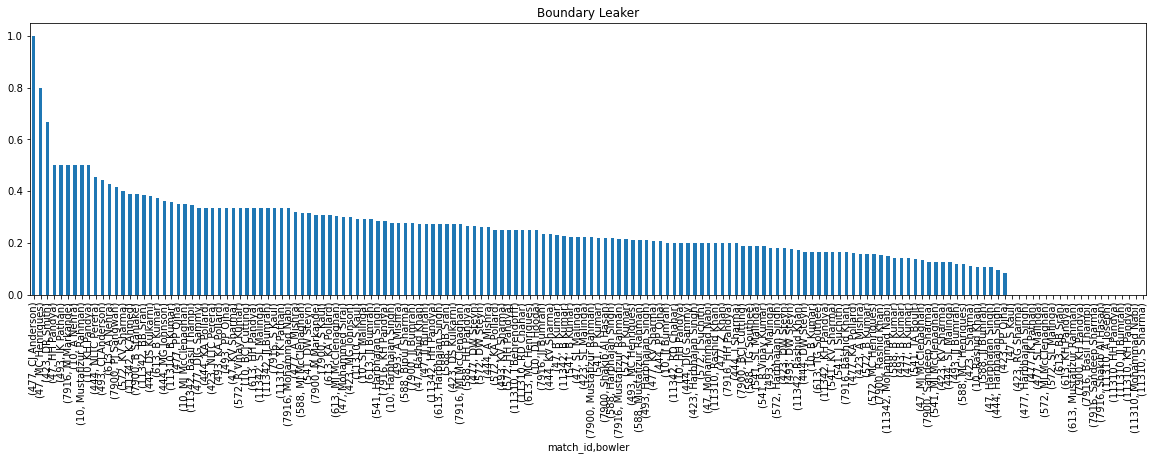

In [170]:
Boundary_Leaker(sub_data).sort_values(ascending=False).plot.bar(title='Boundary Leaker', figsize=(20,5))

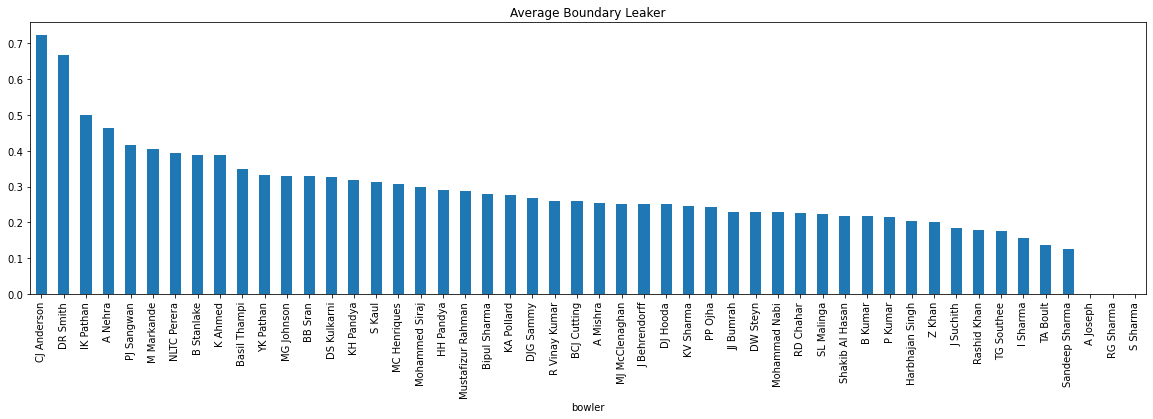

In [172]:
Boundary_Leaker(sub_data).groupby('bowler').mean().sort_values(ascending=False).plot.bar(title='Average Boundary Leaker', figsize=(20,5))

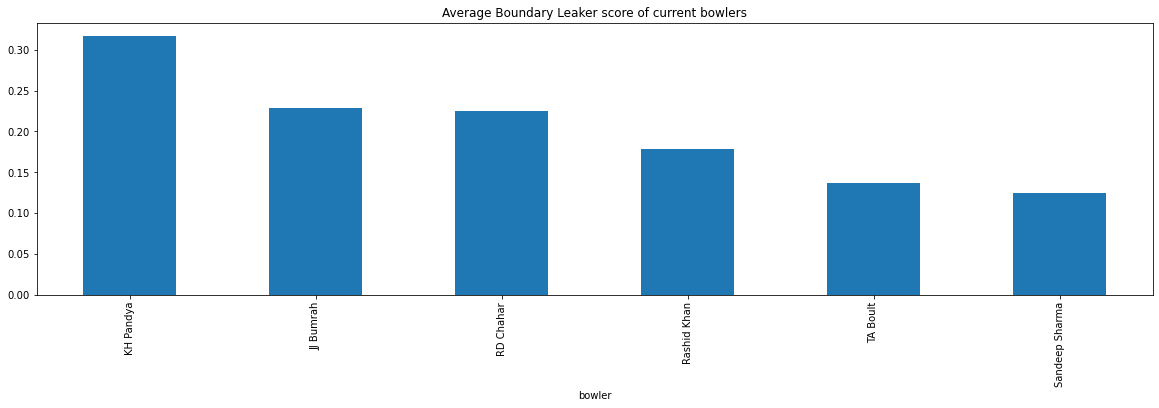

In [175]:
Boundary_Leaker(sub_data[sub_data['bowler'].isin(key_bowlers)]).groupby('bowler').mean().sort_values(ascending=False).plot.bar(title='Average Boundary Leaker score of current bowlers', figsize=(20,5))

### How many wickets will fall in total during the match??

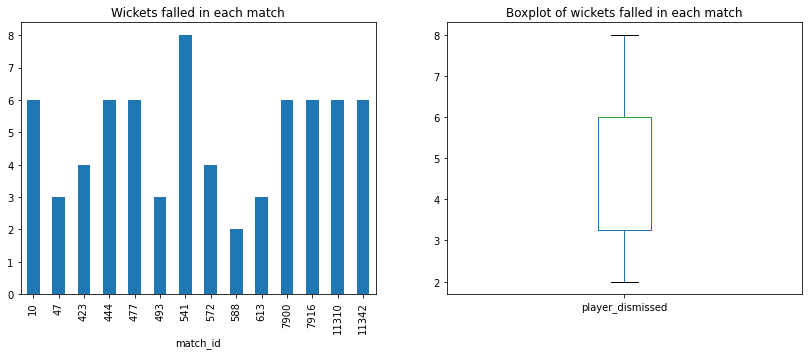

In [178]:
plt.subplot(1, 2, 1)
sub_data.groupby(['match_id'])['player_dismissed'].count().plot.bar(title='Wickets falled in each match', figsize=(14, 5))

plt.subplot(1, 2, 2)
sub_data.groupby(['match_id'])['player_dismissed'].count().plot.box(title='Boxplot of wickets falled in each match')

In [191]:
sub_data.groupby(['match_id', 'batting_team'])['player_dismissed'].count().groupby(['batting_team']).describe()

,count,mean,std,min,25%,50%,75%,max
batting_team,,,,,,,,
Mumbai Indians,14.0,2.357143,1.008208,1.0,2.0,2.0,3.0,4.0
Sunrisers Hyderabad,14.0,2.571429,1.089410,1.0,2.0,3.0,3.0,4.0


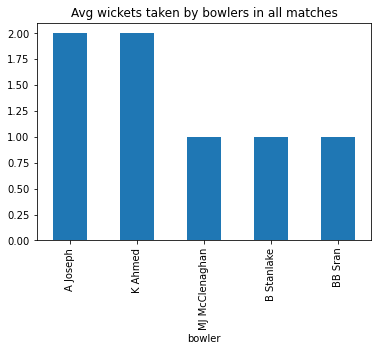

In [197]:
round(sub_data.groupby(['match_id', 'bowler'])['player_dismissed'].count().groupby('bowler').mean()).sort_values(ascending=False).head().plot.bar(title='Avg wickets taken by bowlers in all matches')

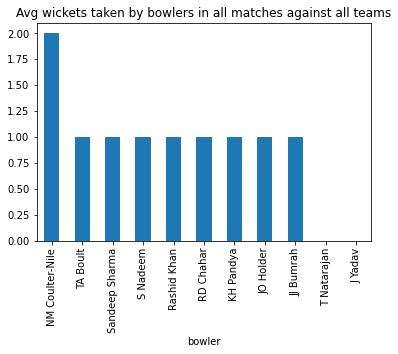

In [202]:
round(data[data['bowler'].isin(key_bowlers)].groupby(['match_id', 'bowler'])['player_dismissed'].count().groupby('bowler').mean()).sort_values(ascending=False).plot.bar(title='Avg wickets taken by bowlers in all matches against all teams')

In [206]:
sub_data[sub_data['bowler'].isin(key_bowlers)].groupby(['batsman', 'bowler'])['player_dismissed'].count().sort_values(ascending=False).head(8)

batsman       bowler        
AS Yadav      Sandeep Sharma    1
WP Saha       JJ Bumrah         1
BCJ Cutting   JJ Bumrah         1
J Bairstow    RD Chahar         1
MC Henriques  JJ Bumrah         1
MJ Guptill    JJ Bumrah         1
KH Pandya     Rashid Khan       1
Ishan Kishan  Rashid Khan       1
Name: player_dismissed, dtype: int64

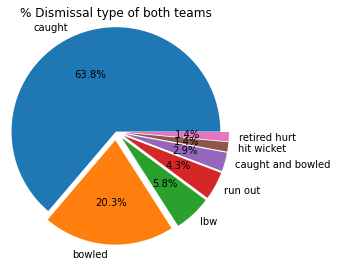

In [232]:
sub_data['dismissal_kind'].value_counts().plot.pie(title='% Dismissal type of both teams', explode=(0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1), autopct='%1.1f%%', radius=1.2)
plt.axis('off')
plt.show()

In [233]:
sub_data1 = sub_data[(sub_data['dismissal_kind'].isin(['caught', 'bowled', 'caught and bowled', 'lbw', 'run_out']))]

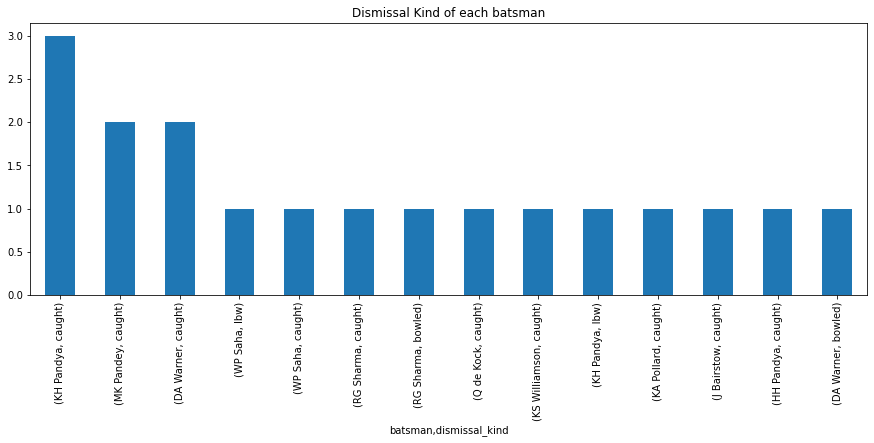

In [241]:
sub_data1[(sub_data1['season']>2015) & (sub_data1['batsman'].isin(key_batters))].groupby('batsman')['dismissal_kind'].value_counts().sort_values(ascending=False).plot.bar(title='Dismissal Kind of each batsman', figsize=(15,5))